<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/cifar100_convnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cifar100 ConvNets

## Import

In [ ]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import cifar100
from keras import regularizers, optimizers, models, layers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers.experimental import preprocessing
from sys import path

## Dataset

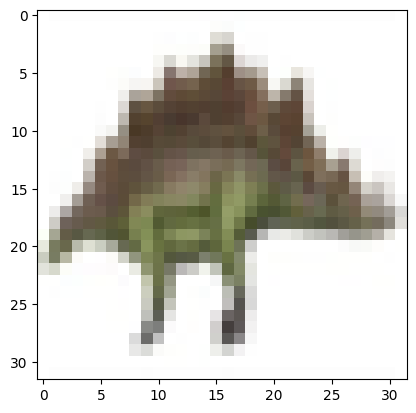

In [ ]:
# DATASET & PREPROCESSING - Cifar100
# 50,000 32x32 color training images and 10,000 test images
# labeled over 100 fine-grained classes that are grouped into 20 coarse-grained classes

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Show img example
img = x_train[1]
plt.imshow(img)

# Processing data
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

batch_size = 64

# Data augmentation to generates img variation
train_gen = ImageDataGenerator(
            shear_range=0.2,
            zoom_range=0.2,
            validation_split=0.2,
            horizontal_flip=True,
            width_shift_range=0.1)

val_gen = ImageDataGenerator(validation_split=0.2)

# train and validation data generators
train_data_gen = train_gen.flow(x_train, y_train, 
                               batch_size=batch_size, 
                               subset="training", 
                               shuffle=True,
                               seed=111)

validation_data_gen = val_gen.flow(x_train, y_train, 
                               batch_size=batch_size,
                               shuffle=False,
                               subset="validation",
                               seed=111)

batch_size = 64

## Model

In [ ]:


# MODEL DEFINITION

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(
    32, (3, 3), 
    activation="relu",
    padding="same",
    input_shape=(32, 32, 3)))
model.add(keras.layers.Conv2D(
    32, (2, 2), 
    activation="relu",
    padding="same"))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))


#model.add(keras.layers.BatchNormalization(renorm=True))
model.add(keras.layers.Conv2D(
    64, (2, 2), 
    activation="relu",
    padding="same"))
model.add(keras.layers.Conv2D(
    64, (2, 2), 
    activation="relu",
    padding="same"))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))


model.add(keras.layers.Conv2D(
    128, (2, 2), 
    activation="relu",
    padding="same"))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))


model.add(keras.layers.Flatten())

model.add(keras.layers.BatchNormalization(renorm=True))
model.add(keras.layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(256, activation="relu",  kernel_regularizer=regularizers.l2(0.001)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(100, activation="softmax"))

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
     


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        8256      
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        16448     
                                                        

## Training

In [ ]:
# CALLBACK - Control iterations and save the best model possible

# Stop iterations regarding to accuracy value
early_stop = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=100)

# Saving model at each epoch if values are better than the previous one
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True, verbose=1)


In [ ]:
# TRAINING

epochs = 1000
history = model.fit(
    train_data_gen,
    validation_data=validation_data_gen,
    callbacks=[model_checkpoint, early_stop],
    epochs=epochs, 
    batch_size=batch_size)

Epoch 1/1000
624/625 [============================>.] - ETA: 0s - loss: 5.0093 - acc: 0.0319
Epoch 1: val_acc improved from -inf to 0.03820, saving model to best_model.h5
625/625 [==============================] - 21s 28ms/step - loss: 5.0086 - acc: 0.0318 - val_loss: 4.8655 - val_acc: 0.0382
Epoch 2/1000
625/625 [==============================] - ETA: 0s - loss: 4.5705 - acc: 0.0717
Epoch 2: val_acc improved from 0.03820 to 0.06540, saving model to best_model.h5
625/625 [==============================] - 17s 27ms/step - loss: 4.5705 - acc: 0.0717 - val_loss: 4.5858 - val_acc: 0.0654
Epoch 3/1000
623/625 [============================>.] - ETA: 0s - loss: 4.3766 - acc: 0.0939
Epoch 3: val_acc improved from 0.06540 to 0.08230, saving model to best_model.h5
625/625 [==============================] - 17s 27ms/step - loss: 4.3762 - acc: 0.0940 - val_loss: 4.4363 - val_acc: 0.0823
Epoch 4/1000
623/625 [============================>.] - ETA: 0s - loss: 4.2191 - acc: 0.1144
Epoch 4: val_acc im

Epoch 30/1000
624/625 [============================>.] - ETA: 0s - loss: 2.9721 - acc: 0.2982
Epoch 30: val_acc did not improve from 0.30310
625/625 [==============================] - 17s 27ms/step - loss: 2.9727 - acc: 0.2981 - val_loss: 3.0531 - val_acc: 0.2898
Epoch 31/1000
624/625 [============================>.] - ETA: 0s - loss: 2.9413 - acc: 0.3022
Epoch 31: val_acc did not improve from 0.30310
625/625 [==============================] - 16s 26ms/step - loss: 2.9413 - acc: 0.3020 - val_loss: 2.9706 - val_acc: 0.3023
Epoch 32/1000
625/625 [==============================] - ETA: 0s - loss: 2.9386 - acc: 0.3020
Epoch 32: val_acc improved from 0.30310 to 0.31210, saving model to best_model.h5
625/625 [==============================] - 17s 27ms/step - loss: 2.9386 - acc: 0.3020 - val_loss: 2.9257 - val_acc: 0.3121
Epoch 33/1000
624/625 [============================>.] - ETA: 0s - loss: 2.9192 - acc: 0.3091
Epoch 33: val_acc improved from 0.31210 to 0.31390, saving model to best_model.

Epoch 60/1000
623/625 [============================>.] - ETA: 0s - loss: 2.5772 - acc: 0.3716
Epoch 60: val_acc improved from 0.38350 to 0.38490, saving model to best_model.h5
625/625 [==============================] - 17s 27ms/step - loss: 2.5773 - acc: 0.3714 - val_loss: 2.5600 - val_acc: 0.3849
Epoch 61/1000
625/625 [==============================] - ETA: 0s - loss: 2.5733 - acc: 0.3734
Epoch 61: val_acc did not improve from 0.38490
625/625 [==============================] - 17s 27ms/step - loss: 2.5733 - acc: 0.3734 - val_loss: 2.6225 - val_acc: 0.3709
Epoch 62/1000
625/625 [==============================] - ETA: 0s - loss: 2.5595 - acc: 0.3774
Epoch 62: val_acc did not improve from 0.38490
625/625 [==============================] - 16s 26ms/step - loss: 2.5595 - acc: 0.3774 - val_loss: 2.5987 - val_acc: 0.3756
Epoch 63/1000
624/625 [============================>.] - ETA: 0s - loss: 2.5539 - acc: 0.3783
Epoch 63: val_acc did not improve from 0.38490
625/625 [=======================

625/625 [==============================] - 17s 27ms/step - loss: 2.3765 - acc: 0.4143 - val_loss: 2.4049 - val_acc: 0.4188
Epoch 91/1000
625/625 [==============================] - ETA: 0s - loss: 2.3787 - acc: 0.4167
Epoch 91: val_acc did not improve from 0.44190
625/625 [==============================] - 17s 27ms/step - loss: 2.3787 - acc: 0.4167 - val_loss: 2.3074 - val_acc: 0.4361
Epoch 92/1000
624/625 [============================>.] - ETA: 0s - loss: 2.3735 - acc: 0.4170
Epoch 92: val_acc did not improve from 0.44190
625/625 [==============================] - 17s 26ms/step - loss: 2.3734 - acc: 0.4170 - val_loss: 2.2996 - val_acc: 0.4388
Epoch 93/1000
624/625 [============================>.] - ETA: 0s - loss: 2.3634 - acc: 0.4184
Epoch 93: val_acc improved from 0.44190 to 0.44550, saving model to best_model.h5
625/625 [==============================] - 17s 27ms/step - loss: 2.3634 - acc: 0.4184 - val_loss: 2.2864 - val_acc: 0.4455
Epoch 94/1000
624/625 [===========================

Epoch 121/1000
624/625 [============================>.] - ETA: 0s - loss: 2.2523 - acc: 0.4428
Epoch 121: val_acc did not improve from 0.46370
625/625 [==============================] - 17s 27ms/step - loss: 2.2521 - acc: 0.4428 - val_loss: 2.2231 - val_acc: 0.4572
Epoch 122/1000
624/625 [============================>.] - ETA: 0s - loss: 2.2529 - acc: 0.4416
Epoch 122: val_acc did not improve from 0.46370
625/625 [==============================] - 16s 26ms/step - loss: 2.2527 - acc: 0.4415 - val_loss: 2.2426 - val_acc: 0.4571
Epoch 123/1000
625/625 [==============================] - ETA: 0s - loss: 2.2538 - acc: 0.4454
Epoch 123: val_acc improved from 0.46370 to 0.46500, saving model to best_model.h5
625/625 [==============================] - 17s 27ms/step - loss: 2.2538 - acc: 0.4454 - val_loss: 2.2006 - val_acc: 0.4650
Epoch 124/1000
625/625 [==============================] - ETA: 0s - loss: 2.2377 - acc: 0.4477
Epoch 124: val_acc improved from 0.46500 to 0.47720, saving model to bes

624/625 [============================>.] - ETA: 0s - loss: 2.1682 - acc: 0.4629
Epoch 151: val_acc did not improve from 0.48550
625/625 [==============================] - 17s 27ms/step - loss: 2.1678 - acc: 0.4631 - val_loss: 2.1527 - val_acc: 0.4709
Epoch 152/1000
625/625 [==============================] - ETA: 0s - loss: 2.1629 - acc: 0.4627
Epoch 152: val_acc did not improve from 0.48550
625/625 [==============================] - 16s 26ms/step - loss: 2.1629 - acc: 0.4627 - val_loss: 2.1245 - val_acc: 0.4806
Epoch 153/1000
624/625 [============================>.] - ETA: 0s - loss: 2.1629 - acc: 0.4644
Epoch 153: val_acc did not improve from 0.48550
625/625 [==============================] - 17s 27ms/step - loss: 2.1629 - acc: 0.4643 - val_loss: 2.1353 - val_acc: 0.4773
Epoch 154/1000
625/625 [==============================] - ETA: 0s - loss: 2.1609 - acc: 0.4658
Epoch 154: val_acc did not improve from 0.48550
625/625 [==============================] - 17s 27ms/step - loss: 2.1609 - 

623/625 [============================>.] - ETA: 0s - loss: 2.1092 - acc: 0.4750
Epoch 181: val_acc did not improve from 0.49660
625/625 [==============================] - 17s 27ms/step - loss: 2.1096 - acc: 0.4749 - val_loss: 2.0653 - val_acc: 0.4944
Epoch 182/1000
623/625 [============================>.] - ETA: 0s - loss: 2.1051 - acc: 0.4739
Epoch 182: val_acc did not improve from 0.49660
625/625 [==============================] - 17s 27ms/step - loss: 2.1055 - acc: 0.4738 - val_loss: 2.0661 - val_acc: 0.4940
Epoch 183/1000
625/625 [==============================] - ETA: 0s - loss: 2.0896 - acc: 0.4805
Epoch 183: val_acc did not improve from 0.49660
625/625 [==============================] - 17s 27ms/step - loss: 2.0896 - acc: 0.4805 - val_loss: 2.1404 - val_acc: 0.4777
Epoch 184/1000
625/625 [==============================] - ETA: 0s - loss: 2.1014 - acc: 0.4772
Epoch 184: val_acc did not improve from 0.49660
625/625 [==============================] - 17s 27ms/step - loss: 2.1014 - 

Epoch 212/1000
624/625 [============================>.] - ETA: 0s - loss: 2.0656 - acc: 0.4845
Epoch 212: val_acc did not improve from 0.50870
625/625 [==============================] - 17s 27ms/step - loss: 2.0651 - acc: 0.4845 - val_loss: 2.0101 - val_acc: 0.5075
Epoch 213/1000
625/625 [==============================] - ETA: 0s - loss: 2.0520 - acc: 0.4863
Epoch 213: val_acc did not improve from 0.50870
625/625 [==============================] - 17s 27ms/step - loss: 2.0520 - acc: 0.4863 - val_loss: 2.0339 - val_acc: 0.5042
Epoch 214/1000
624/625 [============================>.] - ETA: 0s - loss: 2.0576 - acc: 0.4860
Epoch 214: val_acc did not improve from 0.50870
625/625 [==============================] - 17s 27ms/step - loss: 2.0578 - acc: 0.4859 - val_loss: 2.1124 - val_acc: 0.4873
Epoch 215/1000
624/625 [============================>.] - ETA: 0s - loss: 2.0542 - acc: 0.4859
Epoch 215: val_acc improved from 0.50870 to 0.51020, saving model to best_model.h5
625/625 [===============

625/625 [==============================] - 17s 27ms/step - loss: 2.0215 - acc: 0.4931 - val_loss: 1.9684 - val_acc: 0.5166
Epoch 243/1000
623/625 [============================>.] - ETA: 0s - loss: 2.0052 - acc: 0.4991
Epoch 243: val_acc did not improve from 0.51660
625/625 [==============================] - 17s 27ms/step - loss: 2.0052 - acc: 0.4990 - val_loss: 2.0220 - val_acc: 0.5061
Epoch 244/1000
625/625 [==============================] - ETA: 0s - loss: 2.0051 - acc: 0.5000
Epoch 244: val_acc did not improve from 0.51660
625/625 [==============================] - 17s 27ms/step - loss: 2.0051 - acc: 0.5000 - val_loss: 2.0485 - val_acc: 0.4988
Epoch 245/1000
623/625 [============================>.] - ETA: 0s - loss: 2.0076 - acc: 0.4976
Epoch 245: val_acc did not improve from 0.51660
625/625 [==============================] - 17s 26ms/step - loss: 2.0075 - acc: 0.4976 - val_loss: 2.0586 - val_acc: 0.5000
Epoch 246/1000
625/625 [==============================] - ETA: 0s - loss: 2.015

624/625 [============================>.] - ETA: 0s - loss: 1.9727 - acc: 0.5060
Epoch 273: val_acc did not improve from 0.52490
625/625 [==============================] - 17s 27ms/step - loss: 1.9726 - acc: 0.5059 - val_loss: 2.0270 - val_acc: 0.5057
Epoch 274/1000
625/625 [==============================] - ETA: 0s - loss: 1.9705 - acc: 0.5065
Epoch 274: val_acc did not improve from 0.52490
625/625 [==============================] - 17s 27ms/step - loss: 1.9705 - acc: 0.5065 - val_loss: 1.9949 - val_acc: 0.5118
Epoch 275/1000
624/625 [============================>.] - ETA: 0s - loss: 1.9782 - acc: 0.5033
Epoch 275: val_acc improved from 0.52490 to 0.52750, saving model to best_model.h5
625/625 [==============================] - 17s 27ms/step - loss: 1.9785 - acc: 0.5031 - val_loss: 1.9194 - val_acc: 0.5275
Epoch 276/1000
624/625 [============================>.] - ETA: 0s - loss: 1.9737 - acc: 0.5053
Epoch 276: val_acc did not improve from 0.52750
625/625 [==============================

Epoch 304/1000
625/625 [==============================] - ETA: 0s - loss: 1.9588 - acc: 0.5094
Epoch 304: val_acc did not improve from 0.52750
625/625 [==============================] - 17s 28ms/step - loss: 1.9588 - acc: 0.5094 - val_loss: 2.0335 - val_acc: 0.5044
Epoch 305/1000
624/625 [============================>.] - ETA: 0s - loss: 1.9500 - acc: 0.5119
Epoch 305: val_acc did not improve from 0.52750
625/625 [==============================] - 16s 26ms/step - loss: 1.9496 - acc: 0.5120 - val_loss: 1.9635 - val_acc: 0.5178
Epoch 306/1000
625/625 [==============================] - ETA: 0s - loss: 1.9554 - acc: 0.5074
Epoch 306: val_acc did not improve from 0.52750
625/625 [==============================] - 16s 26ms/step - loss: 1.9554 - acc: 0.5074 - val_loss: 1.9812 - val_acc: 0.5159
Epoch 307/1000
623/625 [============================>.] - ETA: 0s - loss: 1.9396 - acc: 0.5111
Epoch 307: val_acc did not improve from 0.52750
625/625 [==============================] - 17s 27ms/step - 

Epoch 335/1000
623/625 [============================>.] - ETA: 0s - loss: 1.9191 - acc: 0.5192
Epoch 335: val_acc did not improve from 0.52750
625/625 [==============================] - 17s 27ms/step - loss: 1.9196 - acc: 0.5192 - val_loss: 1.9295 - val_acc: 0.5259
Epoch 336/1000
624/625 [============================>.] - ETA: 0s - loss: 1.9297 - acc: 0.5130
Epoch 336: val_acc did not improve from 0.52750
625/625 [==============================] - 17s 27ms/step - loss: 1.9294 - acc: 0.5130 - val_loss: 2.0093 - val_acc: 0.5078
Epoch 337/1000
624/625 [============================>.] - ETA: 0s - loss: 1.9120 - acc: 0.5178
Epoch 337: val_acc did not improve from 0.52750
625/625 [==============================] - 17s 28ms/step - loss: 1.9125 - acc: 0.5177 - val_loss: 1.9848 - val_acc: 0.5141
Epoch 338/1000
625/625 [==============================] - ETA: 0s - loss: 1.9294 - acc: 0.5144
Epoch 338: val_acc did not improve from 0.52750
625/625 [==============================] - 17s 27ms/step - 

625/625 [==============================] - 17s 27ms/step - loss: 1.9115 - acc: 0.5168 - val_loss: 1.9672 - val_acc: 0.5167
Epoch 366/1000
624/625 [============================>.] - ETA: 0s - loss: 1.8975 - acc: 0.5241
Epoch 366: val_acc did not improve from 0.53010
625/625 [==============================] - 17s 27ms/step - loss: 1.8974 - acc: 0.5240 - val_loss: 1.9341 - val_acc: 0.5258
Epoch 367/1000
623/625 [============================>.] - ETA: 0s - loss: 1.9061 - acc: 0.5187
Epoch 367: val_acc did not improve from 0.53010
625/625 [==============================] - 17s 28ms/step - loss: 1.9056 - acc: 0.5189 - val_loss: 1.9796 - val_acc: 0.5163
Epoch 368/1000
623/625 [============================>.] - ETA: 0s - loss: 1.9010 - acc: 0.5218
Epoch 368: val_acc did not improve from 0.53010
625/625 [==============================] - 17s 27ms/step - loss: 1.9010 - acc: 0.5217 - val_loss: 1.9467 - val_acc: 0.5249
Epoch 369/1000
624/625 [============================>.] - ETA: 0s - loss: 1.906

625/625 [==============================] - ETA: 0s - loss: 1.8829 - acc: 0.5225
Epoch 396: val_acc did not improve from 0.53520
625/625 [==============================] - 17s 27ms/step - loss: 1.8829 - acc: 0.5225 - val_loss: 1.9307 - val_acc: 0.5266
Epoch 397/1000
625/625 [==============================] - ETA: 0s - loss: 1.8897 - acc: 0.5235
Epoch 397: val_acc did not improve from 0.53520
625/625 [==============================] - 18s 28ms/step - loss: 1.8897 - acc: 0.5235 - val_loss: 1.9768 - val_acc: 0.5161
Epoch 398/1000
624/625 [============================>.] - ETA: 0s - loss: 1.8814 - acc: 0.5254
Epoch 398: val_acc did not improve from 0.53520
625/625 [==============================] - 17s 27ms/step - loss: 1.8813 - acc: 0.5254 - val_loss: 1.9075 - val_acc: 0.5317
Epoch 399/1000
623/625 [============================>.] - ETA: 0s - loss: 1.8849 - acc: 0.5242
Epoch 399: val_acc did not improve from 0.53520
625/625 [==============================] - 17s 27ms/step - loss: 1.8855 - 

Epoch 427/1000
624/625 [============================>.] - ETA: 0s - loss: 1.8664 - acc: 0.5292
Epoch 427: val_acc did not improve from 0.53790
625/625 [==============================] - 17s 28ms/step - loss: 1.8660 - acc: 0.5294 - val_loss: 1.9604 - val_acc: 0.5179
Epoch 428/1000
624/625 [============================>.] - ETA: 0s - loss: 1.8684 - acc: 0.5270
Epoch 428: val_acc did not improve from 0.53790
625/625 [==============================] - 17s 27ms/step - loss: 1.8685 - acc: 0.5271 - val_loss: 1.9321 - val_acc: 0.5214
Epoch 429/1000
623/625 [============================>.] - ETA: 0s - loss: 1.8651 - acc: 0.5279
Epoch 429: val_acc did not improve from 0.53790
625/625 [==============================] - 17s 27ms/step - loss: 1.8656 - acc: 0.5279 - val_loss: 1.9781 - val_acc: 0.5157
Epoch 430/1000
625/625 [==============================] - ETA: 0s - loss: 1.8678 - acc: 0.5260
Epoch 430: val_acc did not improve from 0.53790
625/625 [==============================] - 17s 27ms/step - 

Epoch 458/1000
624/625 [============================>.] - ETA: 0s - loss: 1.8537 - acc: 0.5310
Epoch 458: val_acc did not improve from 0.53790
625/625 [==============================] - 17s 26ms/step - loss: 1.8532 - acc: 0.5310 - val_loss: 1.8747 - val_acc: 0.5360
Epoch 459/1000
625/625 [==============================] - ETA: 0s - loss: 1.8560 - acc: 0.5301
Epoch 459: val_acc did not improve from 0.53790
625/625 [==============================] - 17s 26ms/step - loss: 1.8560 - acc: 0.5301 - val_loss: 1.9941 - val_acc: 0.5123
Epoch 460/1000
625/625 [==============================] - ETA: 0s - loss: 1.8555 - acc: 0.5281
Epoch 460: val_acc did not improve from 0.53790
625/625 [==============================] - 17s 27ms/step - loss: 1.8555 - acc: 0.5281 - val_loss: 1.9643 - val_acc: 0.5157
Epoch 461/1000
624/625 [============================>.] - ETA: 0s - loss: 1.8545 - acc: 0.5320
Epoch 461: val_acc did not improve from 0.53790
625/625 [==============================] - 16s 26ms/step - 

Epoch 489/1000
624/625 [============================>.] - ETA: 0s - loss: 1.8365 - acc: 0.5333
Epoch 489: val_acc did not improve from 0.54160
625/625 [==============================] - 17s 28ms/step - loss: 1.8365 - acc: 0.5332 - val_loss: 1.8543 - val_acc: 0.5389
Epoch 490/1000
625/625 [==============================] - ETA: 0s - loss: 1.8329 - acc: 0.5373
Epoch 490: val_acc did not improve from 0.54160
625/625 [==============================] - 18s 29ms/step - loss: 1.8329 - acc: 0.5373 - val_loss: 1.8992 - val_acc: 0.5300
Epoch 491/1000
625/625 [==============================] - ETA: 0s - loss: 1.8400 - acc: 0.5352
Epoch 491: val_acc did not improve from 0.54160
625/625 [==============================] - 17s 27ms/step - loss: 1.8400 - acc: 0.5352 - val_loss: 1.9923 - val_acc: 0.5083
Epoch 492/1000
625/625 [==============================] - ETA: 0s - loss: 1.8410 - acc: 0.5354
Epoch 492: val_acc did not improve from 0.54160
625/625 [==============================] - 17s 27ms/step - 

Epoch 520/1000
625/625 [==============================] - ETA: 0s - loss: 1.8183 - acc: 0.5404
Epoch 520: val_acc did not improve from 0.54160
625/625 [==============================] - 17s 27ms/step - loss: 1.8183 - acc: 0.5404 - val_loss: 1.9100 - val_acc: 0.5270
Epoch 521/1000
624/625 [============================>.] - ETA: 0s - loss: 1.8205 - acc: 0.5395
Epoch 521: val_acc did not improve from 0.54160
625/625 [==============================] - 16s 26ms/step - loss: 1.8212 - acc: 0.5393 - val_loss: 1.8726 - val_acc: 0.5358
Epoch 522/1000
624/625 [============================>.] - ETA: 0s - loss: 1.8281 - acc: 0.5356
Epoch 522: val_acc did not improve from 0.54160
625/625 [==============================] - 16s 26ms/step - loss: 1.8283 - acc: 0.5354 - val_loss: 1.9320 - val_acc: 0.5238
Epoch 523/1000
625/625 [==============================] - ETA: 0s - loss: 1.8289 - acc: 0.5361
Epoch 523: val_acc did not improve from 0.54160
625/625 [==============================] - 17s 27ms/step - 

625/625 [==============================] - 17s 27ms/step - loss: 1.8126 - acc: 0.5371 - val_loss: 1.8619 - val_acc: 0.5411
Epoch 551/1000
623/625 [============================>.] - ETA: 0s - loss: 1.8167 - acc: 0.5374
Epoch 551: val_acc improved from 0.54760 to 0.55220, saving model to best_model.h5
625/625 [==============================] - 17s 27ms/step - loss: 1.8163 - acc: 0.5376 - val_loss: 1.8207 - val_acc: 0.5522
Epoch 552/1000
625/625 [==============================] - ETA: 0s - loss: 1.8149 - acc: 0.5410
Epoch 552: val_acc did not improve from 0.55220
625/625 [==============================] - 17s 27ms/step - loss: 1.8149 - acc: 0.5410 - val_loss: 1.8799 - val_acc: 0.5346
Epoch 553/1000
623/625 [============================>.] - ETA: 0s - loss: 1.8121 - acc: 0.5396
Epoch 553: val_acc did not improve from 0.55220
625/625 [==============================] - 17s 27ms/step - loss: 1.8122 - acc: 0.5397 - val_loss: 1.8570 - val_acc: 0.5414
Epoch 554/1000
625/625 [====================

623/625 [============================>.] - ETA: 0s - loss: 1.7995 - acc: 0.5412
Epoch 581: val_acc did not improve from 0.55220
625/625 [==============================] - 17s 27ms/step - loss: 1.7993 - acc: 0.5411 - val_loss: 1.8955 - val_acc: 0.5313
Epoch 582/1000
624/625 [============================>.] - ETA: 0s - loss: 1.8098 - acc: 0.5411
Epoch 582: val_acc did not improve from 0.55220
625/625 [==============================] - 17s 27ms/step - loss: 1.8099 - acc: 0.5410 - val_loss: 1.8831 - val_acc: 0.5371
Epoch 583/1000
623/625 [============================>.] - ETA: 0s - loss: 1.8007 - acc: 0.5433
Epoch 583: val_acc did not improve from 0.55220
625/625 [==============================] - 17s 27ms/step - loss: 1.8004 - acc: 0.5434 - val_loss: 1.9235 - val_acc: 0.5276
Epoch 584/1000
624/625 [============================>.] - ETA: 0s - loss: 1.7966 - acc: 0.5417
Epoch 584: val_acc did not improve from 0.55220
625/625 [==============================] - 17s 26ms/step - loss: 1.7960 - 

Epoch 612/1000
623/625 [============================>.] - ETA: 0s - loss: 1.7898 - acc: 0.5425
Epoch 612: val_acc did not improve from 0.55270
625/625 [==============================] - 17s 27ms/step - loss: 1.7902 - acc: 0.5424 - val_loss: 1.8698 - val_acc: 0.5386
Epoch 613/1000
623/625 [============================>.] - ETA: 0s - loss: 1.7835 - acc: 0.5473
Epoch 613: val_acc did not improve from 0.55270
625/625 [==============================] - 17s 27ms/step - loss: 1.7834 - acc: 0.5473 - val_loss: 1.9077 - val_acc: 0.5305
Epoch 614/1000
625/625 [==============================] - ETA: 0s - loss: 1.7983 - acc: 0.5437
Epoch 614: val_acc did not improve from 0.55270
625/625 [==============================] - 16s 26ms/step - loss: 1.7983 - acc: 0.5437 - val_loss: 1.8508 - val_acc: 0.5387
Epoch 615/1000
625/625 [==============================] - ETA: 0s - loss: 1.7926 - acc: 0.5426
Epoch 615: val_acc did not improve from 0.55270
625/625 [==============================] - 17s 26ms/step - 

Epoch 643/1000
623/625 [============================>.] - ETA: 0s - loss: 1.7831 - acc: 0.5455
Epoch 643: val_acc did not improve from 0.55270
625/625 [==============================] - 17s 27ms/step - loss: 1.7831 - acc: 0.5455 - val_loss: 1.8998 - val_acc: 0.5341
Epoch 644/1000
625/625 [==============================] - ETA: 0s - loss: 1.7874 - acc: 0.5449
Epoch 644: val_acc did not improve from 0.55270
625/625 [==============================] - 16s 26ms/step - loss: 1.7874 - acc: 0.5449 - val_loss: 1.8895 - val_acc: 0.5321
Epoch 645/1000
623/625 [============================>.] - ETA: 0s - loss: 1.7791 - acc: 0.5457
Epoch 645: val_acc did not improve from 0.55270
625/625 [==============================] - 17s 27ms/step - loss: 1.7791 - acc: 0.5458 - val_loss: 1.8901 - val_acc: 0.5331
Epoch 646/1000
624/625 [============================>.] - ETA: 0s - loss: 1.7852 - acc: 0.5470
Epoch 646: val_acc did not improve from 0.55270
625/625 [==============================] - 17s 27ms/step - 

Epoch 674/1000
624/625 [============================>.] - ETA: 0s - loss: 1.7804 - acc: 0.5478
Epoch 674: val_acc did not improve from 0.55270
625/625 [==============================] - 17s 27ms/step - loss: 1.7800 - acc: 0.5479 - val_loss: 1.8672 - val_acc: 0.5415
Epoch 675/1000
625/625 [==============================] - ETA: 0s - loss: 1.7786 - acc: 0.5440
Epoch 675: val_acc did not improve from 0.55270
625/625 [==============================] - 17s 27ms/step - loss: 1.7786 - acc: 0.5440 - val_loss: 1.8734 - val_acc: 0.5386
Epoch 676/1000
625/625 [==============================] - ETA: 0s - loss: 1.7779 - acc: 0.5462
Epoch 676: val_acc did not improve from 0.55270
625/625 [==============================] - 17s 27ms/step - loss: 1.7779 - acc: 0.5462 - val_loss: 1.9226 - val_acc: 0.5280
Epoch 677/1000
625/625 [==============================] - ETA: 0s - loss: 1.7812 - acc: 0.5450
Epoch 677: val_acc did not improve from 0.55270
625/625 [==============================] - 17s 27ms/step - 

Epoch 704: early stopping


## Results

In [ ]:
# Best model

base_dir = path[0]
best_model = models.load_model(base_dir+"/best_model.h5")

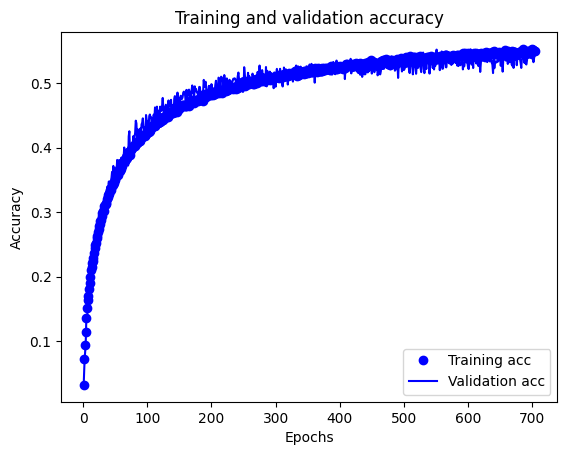

In [ ]:
# LOG ACCURACY RESULTS

history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs_range = range(1, 705)
plt.plot(epochs_range, acc_values, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

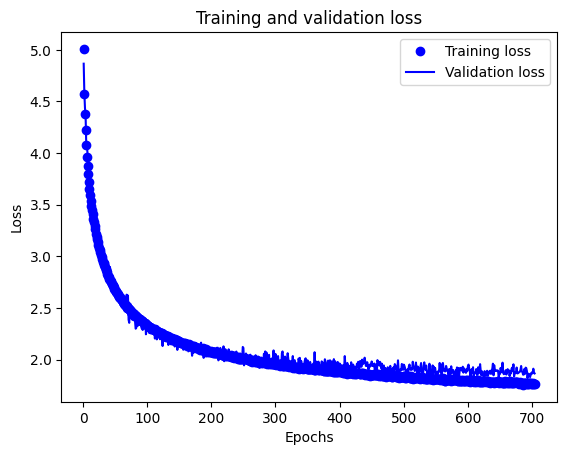

In [ ]:
# LOG LOSS RESULTS

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs_range = range(1, 705)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
     

In [ ]:
# EVALUATION

loss, acc = best_model.evaluate(x_test, y_test)
print("Accuracy is {}%".format(round(acc * 100, 2)))

     


313/313 [==============================] - 2s 5ms/step - loss: 1.7696 - acc: 0.5618
Accuracy is 56.18%
